# Example Usage
This notebook demonstrates a modular Monte Carlo simulation engine for pricing European options and estimating Greeks. 

It also compares results with the closed-form Black-Scholes model to validate accuracy.

## Required lib

In [23]:
import sys
import os

sys.path.append(os.path.abspath(".."))  # makes 'src.' importable


In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [24]:
from src.simulator import generate_gbm_paths
from src.pricer import monte_carlo_pricer
from src.payoff import european_call_payoff, european_put_payoff
from src.greeks import delta_mc
from src.black_scholes import call_price, put_price, delta


## Define Parameters

In [25]:
# Option and market settings
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 1.0

# Monte Carlo simulation settings
M = 252         # time steps
I = 100000      # number of paths
seed = 42

## Visualize Sample GBM Paths

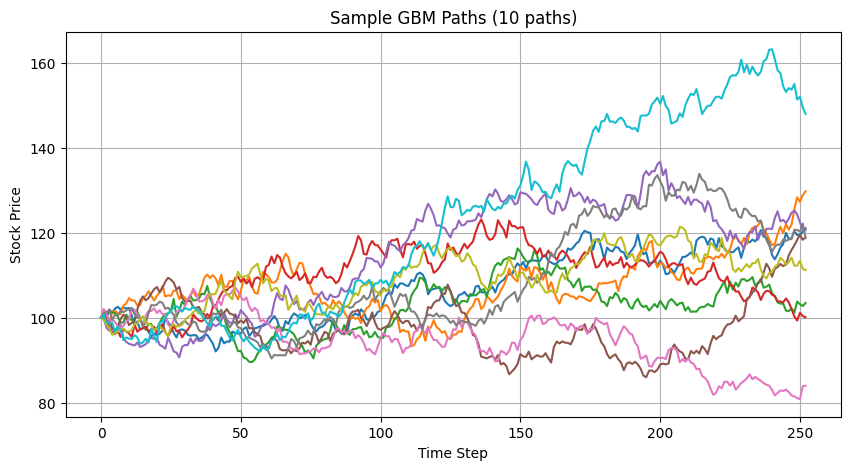

In [26]:
paths = generate_gbm_paths(S0, r, sigma, T, M, 10, seed=seed)

plt.figure(figsize=(10, 5))
plt.plot(paths)
plt.title("Sample GBM Paths (10 paths)")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


## Monte Carlo vs Black-Scholes Comparison

In [27]:
mc_call = monte_carlo_pricer(S0, K, r, sigma, T, M, I, european_call_payoff, seed)
bs_call = call_price(S0, K, r, sigma, T)

print(f"Call Option Price:\n  Monte Carlo:   {mc_call:.4f}\n  Black-Scholes: {bs_call:.4f}")

mc_put = monte_carlo_pricer(S0, K, r, sigma, T, M, I, european_put_payoff, seed)
bs_put = put_price(S0, K, r, sigma, T)

print(f"\nPut Option Price:\n  Monte Carlo:   {mc_put:.4f}\n  Black-Scholes: {bs_put:.4f}")


Call Option Price:
  Monte Carlo:   10.4273
  Black-Scholes: 10.4506

Put Option Price:
  Monte Carlo:   5.5745
  Black-Scholes: 5.5735


## Delta Comparison

In [28]:
mc_delta = delta_mc(S0, K, r, sigma, T, M, I, european_call_payoff, seed=seed)
bs_delta = delta(S0, K, r, sigma, T, option_type='call')

print(f"\nCall Delta:\n  Monte Carlo:   {mc_delta:.4f}\n  Black-Scholes: {bs_delta:.4f}")



Call Delta:
  Monte Carlo:   0.6368
  Black-Scholes: 0.6368
